## Perform Principal component analysis and perform clustering using first 
    3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
    optimum number of clusters and check whether we have obtained same number of clusters with the original data 
    (class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import pandas as pd

In [2]:
wine_data = pd.read_csv('wine.csv')
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
wine_data_1 = wine_data.drop(labels='Type',axis=1)
wine_data_1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Model Building

In [5]:
# Standerizing the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wine_scale_data = ss.fit_transform(wine_data_1)

In [6]:
# PCA Model Building and Training
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
transform_data = pca.fit_transform(wine_scale_data)
transform_data

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [7]:
# Converting PCA transformed data into dataframe formate
pca_data_df         = pd.DataFrame(transform_data)
pca_data_df.columns = ['PCA_1','PCA_2','PCA_3']
pca_data_df

,PCA_1,PCA_2,PCA_3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [8]:
# How much information each component takes
variance = pca.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 , 0.11123631])

In [9]:
# Cumulative variance of each PCA
import numpy as np
np.cumsum(np.round(variance,4)*100)

array([36.2 , 55.41, 66.53])

In [10]:
pca_data_final = pd.concat([wine_data['Type'],pca_data_df],axis=1)
pca_data_final

,Type,PCA_1,PCA_2,PCA_3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


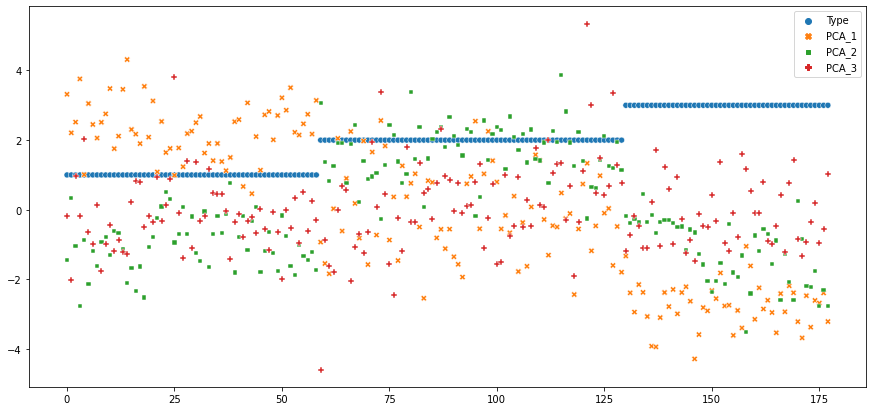

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.scatterplot(data=pca_data_final)
plt.show()

## Clustering on PCA Data

### heirarchial clustering

In [12]:
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

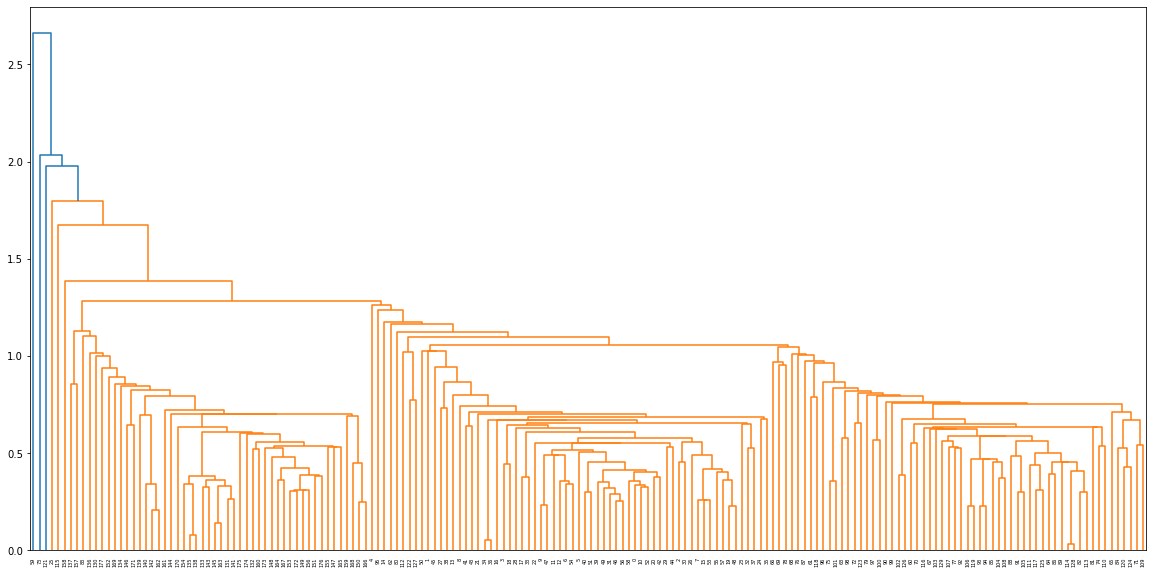

In [13]:
# Dendogram
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(pca_data_final, method='single', metric='euclidean'))
plt.show()

In [14]:
# Model Building for hierarchial Clustering
model_h            = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
hierarcial_cluster = model_h.fit_predict(pca_data_final)
hierarcial_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 3, 2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [15]:
hierarcial_cluster_df         = pd.DataFrame(hierarcial_cluster)
hierarcial_cluster_df.columns = ['hierarcial_cluster']
hierarcial_cluster_df

,hierarcial_cluster
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [16]:
pca_data_final['hierarcial_cluster_pca'] = hierarcial_cluster_df
pca_data_final

,Type,PCA_1,PCA_2,PCA_3,hierarcial_cluster_pca
0,1,3.316751,-1.443463,-0.165739,0
1,1,2.209465,0.333393,-2.026457,0
2,1,2.516740,-1.031151,0.982819,0
3,1,3.757066,-2.756372,-0.176192,0
4,1,1.008908,-0.869831,2.026688,0
...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,1
174,3,-2.601956,-1.757229,0.207581,1
175,3,-2.677839,-2.760899,-0.940942,1
176,3,-2.387017,-2.297347,-0.550696,1


In [17]:
num_clusters_hirar_pca = pca_data_final['hierarcial_cluster_pca'].value_counts()
num_clusters_hirar_pca

0    62
1    48
2    34
3    34
Name: hierarcial_cluster_pca, dtype: int64

### K Mean Clustering

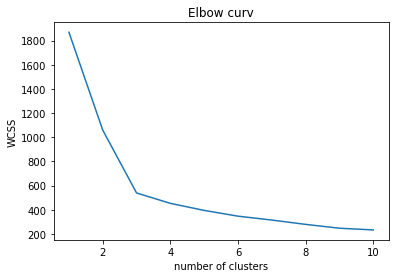

In [18]:
#Elbow Curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(pca_data_final)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Model Building for KMean Clustering
from sklearn.cluster import KMeans
model_k       = KMeans(n_clusters=4)
kmean_cluster = model_k.fit_predict(pca_data_final)
kmean_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 3, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [20]:
kmean_cluster_df        = pd.DataFrame(kmean_cluster)
kmean_cluster_df.columns=['kmean_cluster']
kmean_cluster_df

,kmean_cluster
0,0
1,0
2,0
3,0
4,0
...,...
173,3
174,3
175,3
176,3


In [21]:
pca_data_final['kmean_cluster_pca']=kmean_cluster_df
pca_data_final

,Type,PCA_1,PCA_2,PCA_3,hierarcial_cluster_pca,kmean_cluster_pca
0,1,3.316751,-1.443463,-0.165739,0,0
1,1,2.209465,0.333393,-2.026457,0,0
2,1,2.516740,-1.031151,0.982819,0,0
3,1,3.757066,-2.756372,-0.176192,0,0
4,1,1.008908,-0.869831,2.026688,0,0
...,...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,1,3
174,3,-2.601956,-1.757229,0.207581,1,3
175,3,-2.677839,-2.760899,-0.940942,1,3
176,3,-2.387017,-2.297347,-0.550696,1,3


In [22]:
pca_data_final.iloc[:,[0,1,2,3,5]]

,Type,PCA_1,PCA_2,PCA_3,kmean_cluster_pca
0,1,3.316751,-1.443463,-0.165739,0
1,1,2.209465,0.333393,-2.026457,0
2,1,2.516740,-1.031151,0.982819,0
3,1,3.757066,-2.756372,-0.176192,0
4,1,1.008908,-0.869831,2.026688,0
...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,3
174,3,-2.601956,-1.757229,0.207581,3
175,3,-2.677839,-2.760899,-0.940942,3
176,3,-2.387017,-2.297347,-0.550696,3


In [23]:
num_clusters_kmean_pca=pca_data_final['kmean_cluster_pca'].value_counts()
num_clusters_kmean_pca

0    62
3    48
1    34
2    34
Name: kmean_cluster_pca, dtype: int64

## Clustering Data on Original Data

### Hirarchial Clustering

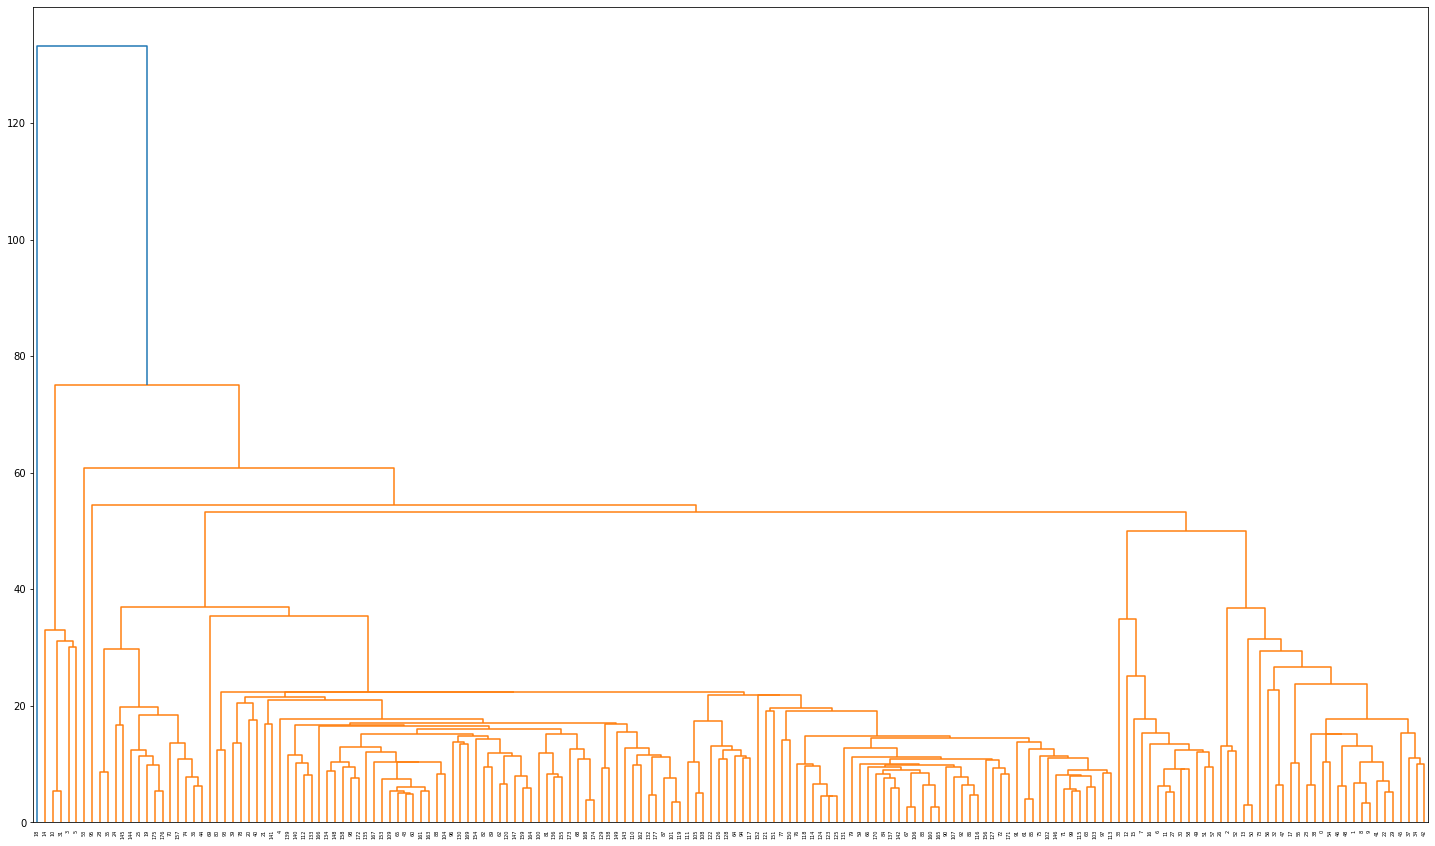

In [24]:
# Dendrogram for original Dataset
plt.figure(figsize=(25,15))
dendrogram_ = sch.dendrogram(sch.linkage(wine_data, method='single', metric='euclidean'))
plt.show()

In [25]:
# Model Building for hierarchial Clustering for original Dataset
model_h = AgglomerativeClustering( n_clusters=4, affinity='euclidean',linkage='single')
hirar   = model_h.fit_predict(wine_data)
hirar

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [26]:
hirar_df         = pd.DataFrame(hirar)
hirar_df.columns = ['hirarchial_cluster']
hirar_df

,hirarchial_cluster
0,0
1,0
2,0
3,2
4,0
...,...
173,0
174,0
175,0
176,0


In [27]:
wine_data['Hirarchial_cluster_orij']=hirar_df
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hirarchial_cluster_orij
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [29]:
num_clusters_hirar_orij = wine_data['Hirarchial_cluster_orij'].value_counts()
num_clusters_hirar_orij

0    171
2      5
1      1
3      1
Name: Hirarchial_cluster_orij, dtype: int64

### KMean Clustering

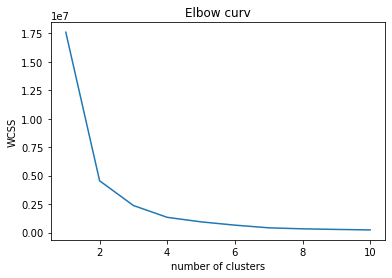

In [30]:
#Elbow Curve for original Dataset
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(wine_data)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# Model Building for KMean Clustering
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=4)
kmean_cluster = model_k.fit_predict(wine_data)
kmean_cluster

array([1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 0, 0, 0,
       1, 1, 0, 0, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [32]:
kmean_cluster_df = pd.DataFrame(kmean_cluster)
kmean_cluster_df.columns=['kmean_cluster']
kmean_cluster_df

,kmean_cluster
0,1
1,1
2,1
3,3
4,0
...,...
173,0
174,0
175,0
176,0


In [33]:
wine_data['kmean_cluster_orij']=kmean_cluster_df
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hirarchial_cluster_orij,kmean_cluster_orij
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0


In [34]:
wine_data.drop(labels=['Hirarchial_cluster_orij'],axis=1)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmean_cluster_orij
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [35]:
num_clusters_kmean_orij=wine_data['kmean_cluster_orij'].value_counts()
num_clusters_kmean_orij

2    68
0    56
1    34
3    20
Name: kmean_cluster_orij, dtype: int64

In [36]:
# Comparision of number of cluster in original data and PCA transformation data
pd.concat([num_clusters_kmean_pca,num_clusters_kmean_orij],axis=1)

,kmean_cluster_pca,kmean_cluster_orij
0,62,56
1,34,34
2,34,68
3,48,20


In [37]:
## Comparision of number of cluster in original data and PCA transformation data
pd.concat([num_clusters_hirar_pca,num_clusters_hirar_orij],axis=1)

,hierarcial_cluster_pca,Hirarchial_cluster_orij
0,62,171
1,48,1
2,34,5
3,34,1
